In [1]:
import pynucastro as pyna
import numpy as np
import matplotlib.pyplot as plt

In [2]:
library = pyna.ReacLibLibrary()

sub = library.linking_nuclei(["p","n","he3","he4","c12","c13","n13","n14","o14","o15",
                             "o16","o17","o18","f17","f18","f19","ne18","ne19","ne20",
                             "mg22","mg24","al27","si28","p31","s32","cl35",
                             "ar36","k39","ca40","ti44","cr48","cr49","cr50","cr51",
                             "cr52","cr53","cr54","fe52","fe54","fe55","fe56","fe57",
                             "fe58","co53","co55","ni55","ni56","ni58","ni59","ni60",
                              "ni61","ni62","ni63","ni64","ni66","ni67","ni68","ni69","ni70","cu57"])

rc = pyna.RateCollection(libraries=sub)

/home/zhi/Github/pynucastro/pynucastro/networks/rate_collection.py:814: RuntimeWarning: overflow encountered in exp
  * np.exp((nuc.Z * u[0] + nuc.N * u[1] - u_c + nuc.nucbind * nuc.A) / k / T / Erg2MeV)
/home/zhi/Github/pynucastro/pynucastro/networks/rate_collection.py:826: RuntimeWarning: invalid value encountered in double_scalars
  nse_ye = sum(nuc.Z * comp_NSE.X[nuc] / nuc.A for nuc in self.unique_nuclei)
/usr/lib64/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/zhi/Github/pynucastro/pynucastro/networks/rate_collection.py:813: RuntimeWarning: overflow encountered in double_scalars
  comp_NSE.X[nuc] = m_u * nuc.A_nuc * pf / rho * (2.0 * np.pi * m_u * nuc.A_nuc * k * T / h**2)**(3. / 2.) \


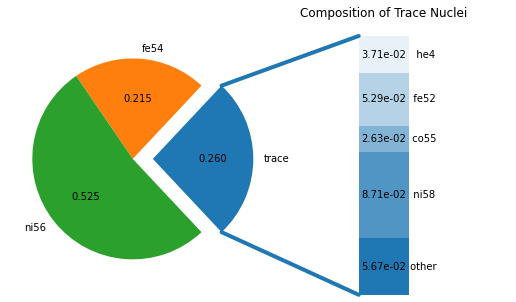

  X(n) : 1.8974153174331634e-08
  X(p) : 0.011886172752414569
  X(he3) : 1.9733060135747423e-11
  X(he4) : 0.03714305607580723
  X(c12) : 1.4080453025813643e-07
  X(c13) : 2.8025416199147128e-14
  X(n13) : 1.6789527436765393e-11
  X(n14) : 1.4746344081866734e-12
  X(o14) : 1.0013429045759465e-12
  X(o15) : 4.264069586029257e-11
  X(o16) : 5.175471134967727e-07
  X(o17) : 1.582071874096458e-14
  X(o18) : 3.989435564598505e-18
  X(f17) : 2.880504700568629e-12
  X(f18) : 1.3667030695644147e-14
  X(f19) : 2.118544887507823e-15
  X(ne18) : 3.142499674042892e-14
  X(ne19) : 1.0506115580731977e-13
  X(ne20) : 6.4580796318599e-09
  X(mg22) : 1.1132439216537798e-12
  X(mg24) : 3.018664330493739e-06
  X(al27) : 9.395512362345753e-09
  X(si28) : 0.005157760224826083
  X(p31) : 8.389889152121968e-06
  X(s32) : 0.007857641586762193
  X(cl35) : 1.3901573640096527e-05
  X(ar36) : 0.006144422171619479
  X(k39) : 3.772067438562267e-05
  X(ca40) : 0.011068329552297416
  X(ti44) : 0.00036153352519809886


In [3]:
comp = rc.get_comp_NSE(1e7,5e9,0.5)
comp.plot()
print(comp)

In [4]:
rho_1 = 1e7
ye_s = np.linspace(0.4,0.6,80)
temp_1 = 9.0e9
X_s_1 = []

for i, ye in enumerate(ye_s):
    nse_comp_1 = rc.get_comp_NSE(rho_1, temp_1, ye, init_guess=[-6.0,-11.5], tell_sol=False)
    nse_X_s_1 = [nse_comp_1.X[nuc] for nuc in nse_comp_1.X]
    X_s_1.append(nse_X_s_1)

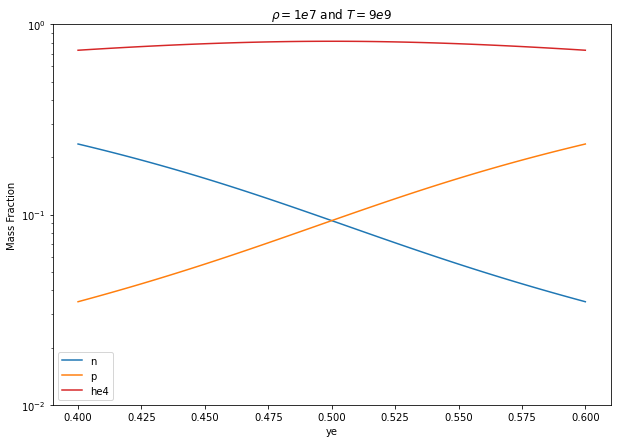

In [5]:
X_s_1 = np.array(X_s_1)
nuc_names = rc.get_nuclei()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
for k in range(len(nuc_names)):
    line, = ax.plot(ye_s, X_s_1[:,k])
    if (max(X_s_1[:,k]) > 0.01):
        line.set_label(str(nuc_names[k]))
ax.legend(loc = "best")
ax.set_xlabel('ye')
ax.set_ylabel('Mass Fraction')
ax.set_yscale('log')
ax.set_ylim([0.01,1])
ax.set_title(r"$\rho = 1e7$ and $T=9e9$")
plt.savefig("nse_fig1.pdf", format="pdf")

In [6]:
rho_2 = 1e7
ye_s = np.linspace(0.4,0.6,100)
temp_2 = 6.5e9
X_s_2 = []

for i, ye in enumerate(ye_s):
    nse_comp_2 = rc.get_comp_NSE(rho_2, temp_2, ye, init_guess=[-6.0,-11.5], tell_sol=False)
    nse_X_s_2 = [nse_comp_2.X[nuc] for nuc in nse_comp_2.X]
    X_s_2.append(nse_X_s_2)

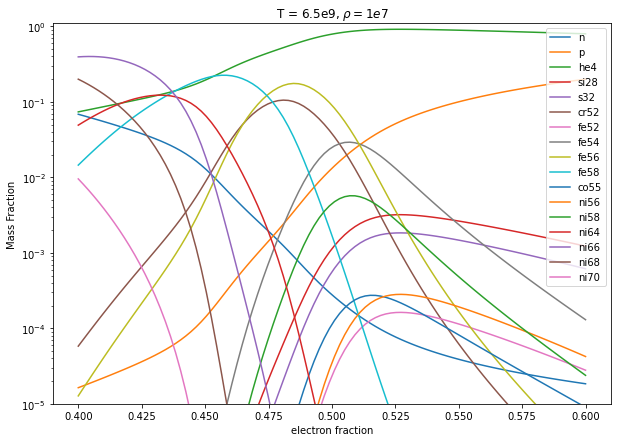

In [7]:
X_s_2 = np.array(X_s_2)
nuc_names = rc.get_nuclei()

paper_nucs =["n", "p", "he4", "si28", "s32", "cr52", "fe52", "fe54", "fe56", "fe58",
             "co55", "ni56", "ni58", "ni64", "ni66", "ni68", "ni70"]
paper_nucs = list(map(pyna.Nucleus, paper_nucs))


low_limit = 1e-5
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
for k in range(len(nuc_names)):
    if (nuc_names[k] not in paper_nucs):
        continue
    line, = ax.plot(ye_s, X_s_2[:,k])
    if (max(X_s_2[:,k]) > low_limit):
        line.set_label(str(nuc_names[k]))

ax.legend(loc = "upper right")
ax.set_xlabel('electron fraction')
ax.set_ylabel('Mass Fraction')
ax.set_yscale('log')
ax.set_ylim([low_limit,1.1])
ax.set_title(r"T = 6.5e9, $\rho = 1e7$")
plt.savefig("nse_fig2.pdf", format="pdf")

In [8]:
rho_3 = 1e7
ye_s = np.linspace(0.4,0.6,120)
temp_3 = 3.5e9
X_s_3 = []

for i, ye in enumerate(ye_s):
    nse_comp_3 = rc.get_comp_NSE(rho_3, temp_3, ye, init_guess=[-6.0,-11.5], tell_sol=False)
    nse_X_s_3 = [nse_comp_3.X[nuc] for nuc in nse_comp_3.X]
    X_s_3.append(nse_X_s_3)

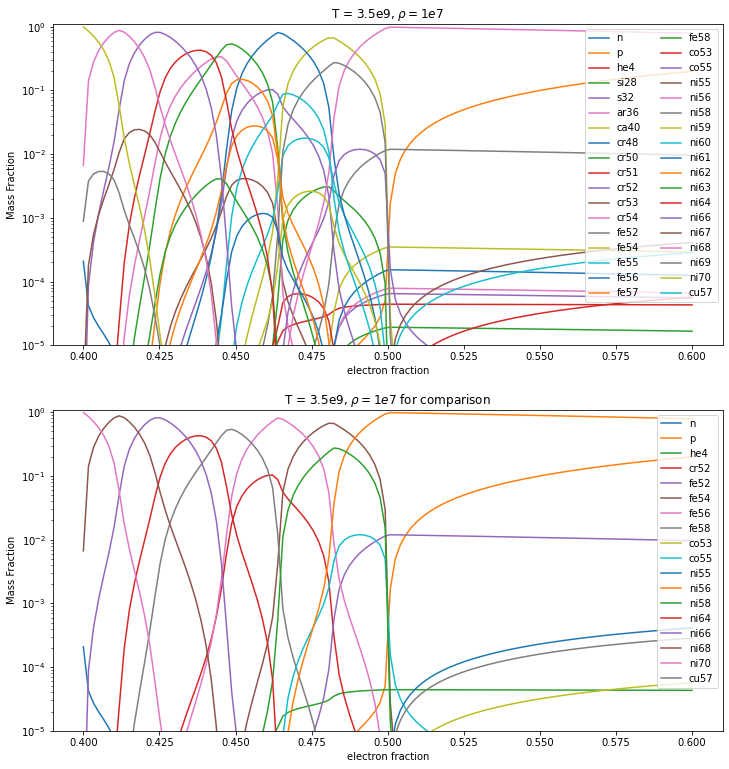

In [9]:
X_s_3 = np.array(X_s_3)
nuc_names = rc.get_nuclei()

paper_nucs = ["p", "n", "he4", "cr52", "fe52", "fe54", "fe56", "fe58", "co53", "co55", "ni55", "cu57",
             "ni56", "ni58", "ni64", "ni66", "ni68", "ni70"]
paper_nucs = list(map(pyna.Nucleus, paper_nucs))

low_limit = 1e-5
fig = plt.figure(figsize=(12,13))
ax = fig.add_subplot(211)
ax1 = fig.add_subplot(212)
for k in range(len(nuc_names)):
    if nuc_names[k] in paper_nucs:
        line1, = ax1.plot(ye_s, X_s_3[:,k])
        if (max(X_s_3[:,k]) > low_limit):
            line1.set_label(str(nuc_names[k]))
            
    line, = ax.plot(ye_s, X_s_3[:,k])
    if (max(X_s_3[:,k]) > low_limit):
        line.set_label(str(nuc_names[k]))

ax.legend(loc = "upper right", prop={'size':10},ncol=2)
ax.set_xlabel('electron fraction')
ax.set_ylabel('Mass Fraction')
ax.set_yscale('log')
ax.set_ylim([low_limit,1.1])
ax.set_title(r"T = 3.5e9, $\rho = 1e7$")

ax1.legend(loc = "upper right")
ax1.set_xlabel('electron fraction')
ax1.set_ylabel('Mass Fraction')
ax1.set_yscale('log')
ax1.set_ylim([low_limit,1.1])
ax1.set_title(r"T = 3.5e9, $\rho = 1e7$ for comparison")

plt.savefig("nse_fig3.pdf", format="pdf")

In [10]:
rho = 1e7
ye = 0.5
temps = np.linspace(2.5, 12.0, 100)
X_s = []

for i, temp in enumerate(temps):
    nse_comp = rc.get_comp_NSE(rho, temp*1.0e9, ye, init_guess=[-6.0,-11.5], tell_sol=False)
    nse_X_s = [nse_comp.X[nuc] for nuc in nse_comp.X]
    X_s.append(nse_X_s)

/home/zhi/Github/pynucastro/pynucastro/networks/rate_collection.py:814: RuntimeWarning: overflow encountered in exp
  * np.exp((nuc.Z * u[0] + nuc.N * u[1] - u_c + nuc.nucbind * nuc.A) / k / T / Erg2MeV)
/usr/lib64/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


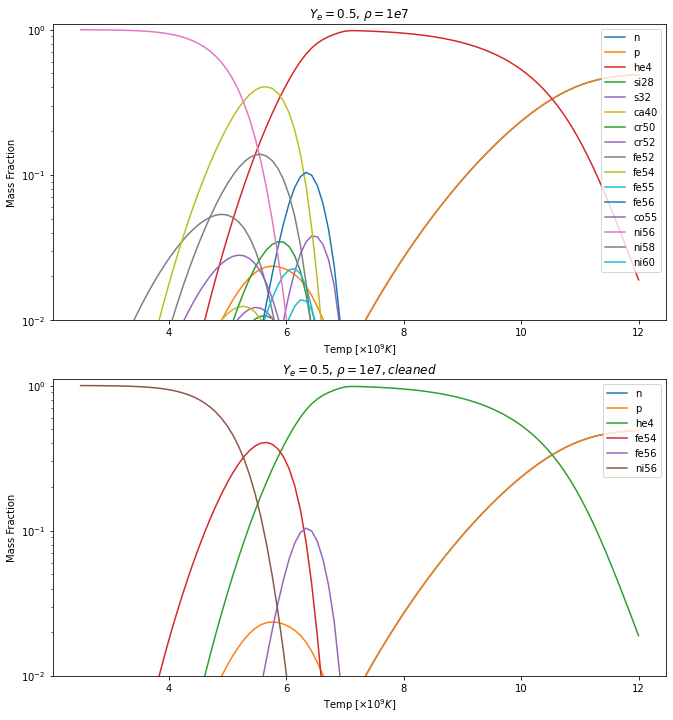

In [11]:
X_s = np.array(X_s)
nuc_names = rc.get_nuclei()

paper_nucs = ["p", "n", "he4", "ni56", "fe54", "fe56"]
paper_nucs = list(map(pyna.Nucleus, paper_nucs))

low_limit = 1e-2
fig = plt.figure(figsize=(11,12))
ax = fig.add_subplot(211)
ax1 = fig.add_subplot(212)
for k in range(len(nuc_names)):
    if nuc_names[k] in paper_nucs:
        line1, = ax1.plot(temps, X_s[:,k])
        if (max(X_s[:,k]) > low_limit):
            line1.set_label(str(nuc_names[k]))
            
    line, = ax.plot(temps, X_s[:,k])
    if (max(X_s[:,k]) > low_limit):
        line.set_label(str(nuc_names[k]))

ax.legend(loc = "upper right")
ax.set_xlabel(r'Temp $[\times 10^9 K]$')
ax.set_ylabel('Mass Fraction')
ax.set_yscale('log')
ax.set_ylim([low_limit,1.1])
ax.set_title(r"$Y_e = 0.5$, $\rho = 1e7$")

ax1.legend(loc = "upper right")
ax1.set_xlabel(r'Temp $[\times 10^9 K]$')
ax1.set_ylabel('Mass Fraction')
ax1.set_yscale('log')
ax1.set_ylim([low_limit,1.1])
ax1.set_title(r"$Y_e = 0.5$, $\rho = 1e7, cleaned$")

plt.savefig("nse_fig4.pdf", format="pdf")